In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
statlog_german_credit_data = fetch_ucirepo(id=144) 
  
# data (as pandas dataframes) 
X = statlog_german_credit_data.data.features 
y = statlog_german_credit_data.data.targets 
  
# metadata 
print(statlog_german_credit_data.metadata) 
  
# variable information 
print(statlog_german_credit_data.variables) 

# Number of features
num_features = X.shape[1]

# Number of entries
num_entries = X.shape[0]

# Identify categorical and quantitative features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
quantitative_features = X.select_dtypes(exclude=['object']).columns.tolist()

# Number of categorical and quantitative features
num_categorical = len(categorical_features)
num_numerical = len(quantitative_features)

print(f"Number of Features: {num_features}")
print(f"Number of Entries: {num_entries}")
print(f"Number of Categorical Features: {num_categorical}")
print(f"Number of Numerical Features: {num_numerical}")

num_classes = y.nunique()
print(f"Number of Classes: {num_classes}")

{'uci_id': 144, 'name': 'Statlog (German Credit Data)', 'repository_url': 'https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data', 'data_url': 'https://archive.ics.uci.edu/static/public/144/data.csv', 'abstract': 'This dataset classifies people described by a set of attributes as good or bad credit risks. Comes in two formats (one all numeric). Also comes with a cost matrix', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1000, 'num_features': 20, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Other', 'Marital Status', 'Age', 'Occupation'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5NC77', 'creators': ['Hans Hofmann'], 'intro_paper': None, 'additional_info': {'summary': 'Two datasets are provided.  the original dataset, in the form provided by

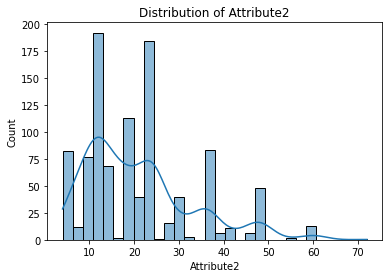

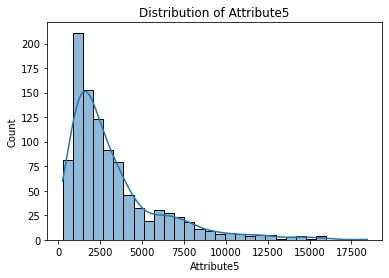

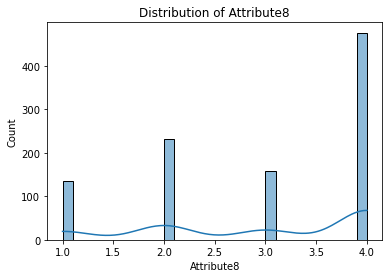

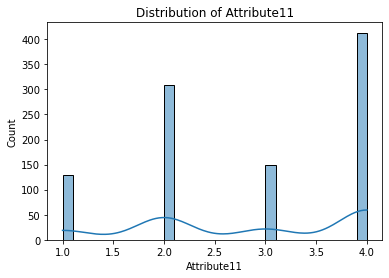

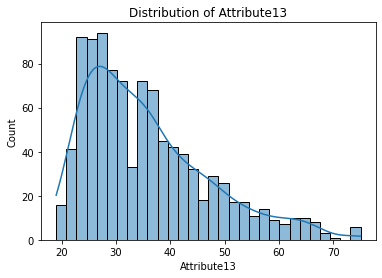

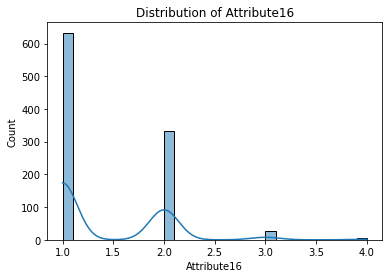

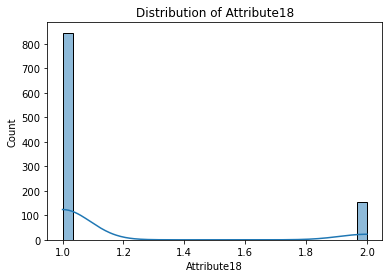

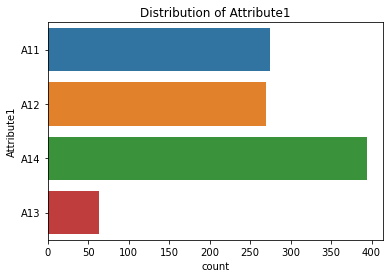

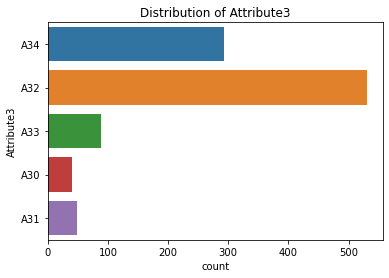

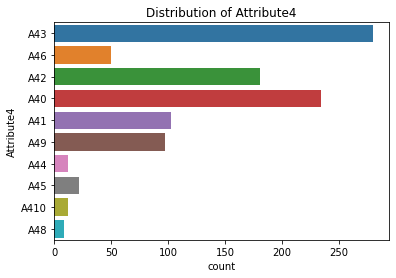

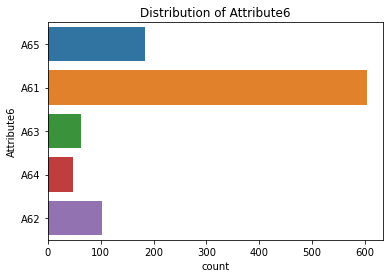

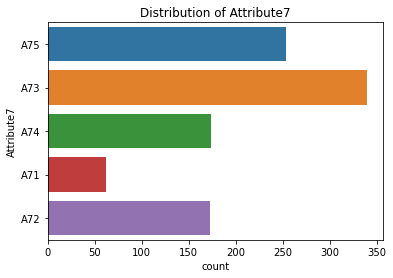

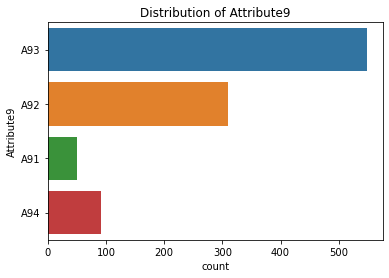

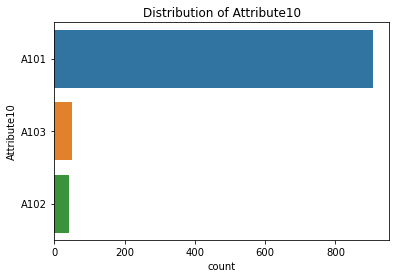

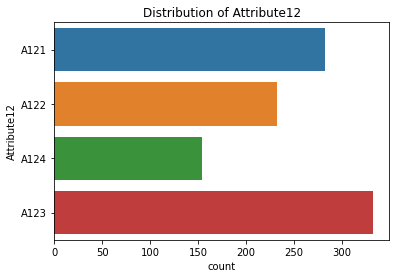

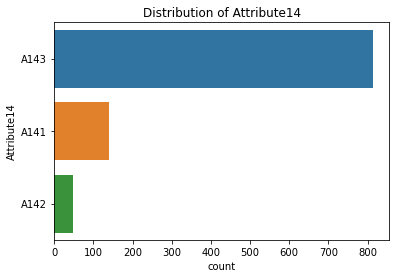

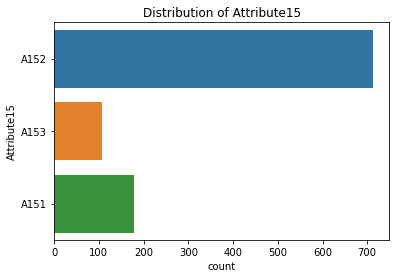

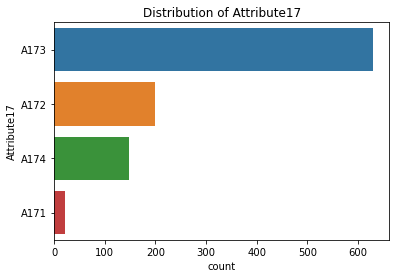

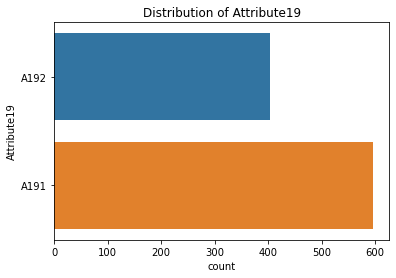

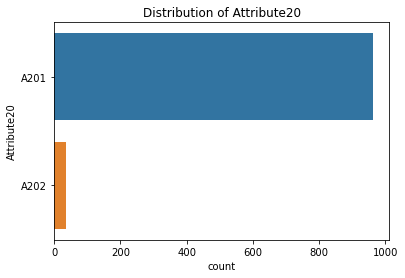

In [2]:

import matplotlib.pyplot as plt
import seaborn as sns

if True:
    # 1. Visualizing Data Distribution for Numerical Features
    numerical_features = X.select_dtypes(include=["float64", "int64"]).columns

    for feature in numerical_features:
        plt.figure(figsize=(6, 4))
        sns.histplot(X[feature], bins=30, kde=True)
        plt.title(f'Distribution of {feature}')
        plt.show()

    # 2. Visualizing Categorical Features
    categorical_features = X.select_dtypes(include=["object"]).columns

    for feature in categorical_features:
        plt.figure(figsize=(6, 4))
        sns.countplot(y=X[feature])
        plt.title(f'Distribution of {feature}')
        plt.show()


In [3]:
from sklearn.preprocessing import LabelEncoder

# Initialize a dictionary to hold our label encoders for each feature
label_encoders = {}

for feature in categorical_features:
    # Initialize the encoder
    le = LabelEncoder()
    
    # Fit and transform the data
    X[feature] = le.fit_transform(X[feature])
    
    # Store the label encoder in the dictionary for potential inverse transformations later
    label_encoders[feature] = le

print(X.head())


   Attribute1  Attribute2  Attribute3  Attribute4  Attribute5  Attribute6  \
0           0           6           4           4        1169           4   
1           1          48           2           4        5951           0   
2           3          12           4           7        2096           0   
3           0          42           2           3        7882           0   
4           0          24           3           0        4870           0   

   Attribute7  Attribute8  Attribute9  Attribute10  Attribute11  Attribute12  \
0           4           4           2            0            4            0   
1           2           2           1            0            2            0   
2           3           2           2            0            3            0   
3           3           2           2            2            4            1   
4           2           3           2            0            4            3   

   Attribute13  Attribute14  Attribute15  Attribute16  A

C:\Users\mihao\AppData\Local\Temp/ipykernel_26104/3933781425.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[feature] = le.fit_transform(X[feature])


In [4]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Create the MinMaxScaler object
scaler = MinMaxScaler()

# Apply MinMax scaling to all features in X
X_scaled = scaler.fit_transform(X)

# Convert the scaled data back to a DataFrame (optional, but it can make further operations easier)
X = pd.DataFrame(X_scaled, columns=X.columns)

# Display the normalized data
print(X.head())


   Attribute1  Attribute2  Attribute3  Attribute4  Attribute5  Attribute6  \
0    0.000000    0.029412        1.00    0.444444    0.050567         1.0   
1    0.333333    0.647059        0.50    0.444444    0.313690         0.0   
2    1.000000    0.117647        1.00    0.777778    0.101574         0.0   
3    0.000000    0.558824        0.50    0.333333    0.419941         0.0   
4    0.000000    0.294118        0.75    0.000000    0.254209         0.0   

   Attribute7  Attribute8  Attribute9  Attribute10  Attribute11  Attribute12  \
0        1.00    1.000000    0.666667          0.0     1.000000     0.000000   
1        0.50    0.333333    0.333333          0.0     0.333333     0.000000   
2        0.75    0.333333    0.666667          0.0     0.666667     0.000000   
3        0.75    0.333333    0.666667          1.0     1.000000     0.333333   
4        0.50    0.666667    0.666667          0.0     1.000000     1.000000   

   Attribute13  Attribute14  Attribute15  Attribute16  A

import seaborn as sns
import matplotlib.pyplot as plt

# Histograms for the first few columns
for col in X.columns[:20]:
    plt.figure(figsize=(8, 5))
    sns.histplot(X[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


In [5]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import logging
import os
%load_ext line_profiler
try:
    profile
except NameError:
    def profile(func): 
        return func

KeyboardInterrupt: 

In [ ]:
class ClusterOps:
    def __init__(self, parent):
        self.parent = parent
        self.feature_dim = parent.feature_dim
        self.Gamma_max = torch.exp(-torch.tensor(parent.num_sigma, dtype=torch.float32, device=self.parent.device)**2)
    
    @profile             
    def _add_new_cluster(self, z, label):

        self._update_S_0(z)

        self.parent.c += 1
        self.parent.n = torch.cat((self.parent.n, torch.tensor([1], dtype=torch.int64, device=self.parent.device)))
        self.parent.mu.append(torch.nn.Parameter(z.clone().to(self.parent.device), requires_grad=True))

        initial_cov = self.parent.S_0
        self.parent.S.append(torch.nn.Parameter(initial_cov, requires_grad=True))
        initial_cov_inv = self.parent.math_ops._compute_covariance_inverse(initial_cov)
        self.parent.S_inv.append(torch.nn.Parameter(initial_cov_inv, requires_grad=True))

        self.parent.cluster_labels = torch.cat((self.parent.cluster_labels, torch.tensor([label], dtype=torch.int64, device=self.parent.device)))
        if label not in self.parent.label_to_clusters:
            self.parent.label_to_clusters[label] = torch.empty(0, dtype=torch.int64, device=self.parent.device)
        self.parent.label_to_clusters[label] = torch.cat((self.parent.label_to_clusters[label], torch.tensor([self.parent.c - 1], dtype=torch.int64, device=self.parent.device)))
        self.parent.Gamma = torch.cat((self.parent.Gamma, torch.tensor([1.0], dtype=torch.float32, device=self.parent.device)))
        
        return
    
    def _update_S_0(self, sample):
        sample = sample.squeeze()  # Reducing to 1D if necessary

        # Initialize max, min if they do not exist
        if not hasattr(self, 'max_values'):
            self.max_values = sample.clone()
        if not hasattr(self, 'min_values'):
            self.min_values = sample.clone()

        # Update max and min values
        for i, feature in enumerate(sample):
            if feature > self.max_values[i]:
                self.max_values[i] = feature
            elif feature < self.min_values[i]:
                self.min_values[i] = feature

        # Ensure all tensors are on the same device
        self.max_values = self.max_values.to(self.parent.device)
        self.min_values = self.min_values.to(self.parent.device)

        # Calculate the number of unique values in self.parent.mu for each dimension
           # Calculate the number of unique values in self.parent.mu for each dimension
        if len(self.parent.mu) > 0:
            # Extract all mu values into a single tensor
            all_mu = torch.stack([mu for mu in self.parent.mu], dim=0)
            unique_counts = torch.tensor([torch.unique(all_mu[:, i]).numel() for i in range(all_mu.size(1))], device=self.parent.device)
        else:
            # If self.parent.mu is empty, assume a default unique count for each feature
            # This can be 1 or any other default value you choose
            unique_counts = torch.zeros(sample.size(0), device=self.parent.device)

        # Calculate ΔS_0 for each feature using the number of unique values
        delta_S_0 = (self.max_values - self.min_values) / (2*(unique_counts + 1))**2

        self.parent.S_0 = self.parent.S_0  + 1e-1*(torch.diag(delta_S_0)-self.parent.S_0)
        self.parent.S_0 = torch.max(self.parent.S_0, self.parent.S_0_initial)


    @profile      
    def _increment_cluster(self, z, j, label):
        assert label == self.parent.cluster_labels[j], "Mismatched label for cluster increment"
        if self.parent.enable_debugging and (j >= len(self.parent.mu) or j < 0):
            logging.warning(f"Warning rule increment! Invalid cluster index: {j}. Valid indices are between 0 and {len(self.parent.mu)-1}.")
        
        e = z - self.parent.mu[j]
        self.parent.mu[j].data = self.parent.mu[j] + 1 / (1 + self.parent.n[j]) * e
        self.parent.S[j].data = self.parent.S[j] + e.view(-1, 1) @ (z - self.parent.mu[j]).view(1, -1)
        self.parent.n[j] = self.parent.n[j] + 1
        self.parent.math_ops._update_inverse_covariance(j)
        
        return
    
    @profile      
    def increment_or_add_cluster(self, z, label):

        self.parent.matching_clusters = torch.where(self.parent.cluster_labels == label)[0] 
        if len([self.parent.Gamma[i] for i in self.parent.matching_clusters]) == 0:
            self._add_new_cluster(z, label)
            logging.info(f"Info. Added new cluster for label {label} due to no matching clusters. Total clusters now: {self.parent.c}")
            return torch.tensor([1.0], device=self.parent.device)
        
        n_mean = torch.median(torch.tensor(self.parent.n, dtype=torch.float32, device=self.parent.device))
        beta = 1.0
        
        matching_clusters_tensor = torch.tensor([i for i, cluster_label in enumerate(self.parent.cluster_labels) if label == cluster_label], device=self.parent.device)
        
        filtered_n = [self.parent.n[i] for i in matching_clusters_tensor]
        weights = torch.sigmoid(beta * (n_mean - torch.tensor(filtered_n, dtype=torch.float32, device=self.parent.device)))
        matching_values = torch.tensor([self.parent.Gamma[i] for i in matching_clusters_tensor], dtype=torch.float32, device=self.parent.device)# * weights
        _, relative_j = torch.max(matching_values, dim=0)
        j = matching_clusters_tensor[relative_j].item()  # Map relative index back to full list of clusters
        
        if self.parent.enable_adding and (self.parent.Gamma[j] <= self.Gamma_max):
            self._add_new_cluster(z, label)
            logging.info(f"Info. Added new cluster for label {label} due to low Gamma value. Total clusters now: {self.parent.c}")
        else:
            self._increment_cluster(z, j, label)

        return



In [ ]:
class MergingMechanism:
    def __init__(self, parent):
        self.parent = parent
        self.feature_dim = parent.feature_dim
        self.Gamma_max = torch.exp(-torch.tensor(parent.num_sigma, dtype=torch.float32, device=self.parent.device)**2)
    
    @profile      
    def perform_merge(self, kappa, kappa_min, Sigma_ij, mu_ij, n_ij):
        i, j = (kappa == kappa_min).nonzero(as_tuple=True)

        # Display if there are more than one set of values for i and j
        if len(i) > 1 or len(j) > 1:
            if self.parent.enable_debugging: 
                logging.warning(f"Warning merging! Multiple minimum kappa values detected. i: {i}, j: {j}")
            i, j = i[0], j[0]

        # Start plotting BEFORE the merge
        if self.parent.enable_debugging: 
            plt.figure(figsize=(6, 6))
            self.plot_cluster(i, 'Cluster i (Before)', 'blue')
            self.plot_cluster(j, 'Cluster j (Before)', 'red')
            
        self.parent.mu[i].data = mu_ij[:, i, j].squeeze()
        self.parent.S[i].data = (Sigma_ij[:, :, i, j] * n_ij[i, j]).squeeze()
        self.parent.n[i] = int(n_ij[i, j].item())
        self.parent.math_ops._update_inverse_covariance(i)

        # Check if n_ij[i, j] is an integer
        if not torch.equal(n_ij[i, j], torch.floor(n_ij[i, j])):
            logging.warning(f"Warning merging! Expected n_ij[{i}, {j}] to be an integer, but got {n_ij[i, j].item()} instead.")

        # After the clusters have been merged and necessary updates have been made
        # to the parameters, we update the Gamma values.
        # For each data point, Gamma is updated to be the maximum of the two clusters that were merged.
        # Note: This assumes self.parent.Gamma has been previously computed for all data points.
        self.parent.Gamma[i] = max(self.parent.Gamma[i], self.parent.Gamma[j])

        # Then remove the j-th cluster's Gamma values as this cluster no longer exists
        self.parent.Gamma = torch.cat((self.parent.Gamma[:j], self.parent.Gamma[j+1:]))


        # Remove the j-th cluster as this cluster no longer exists
        self.parent.n = torch.cat((self.parent.n[:j], self.parent.n[j+1:]))
        self.parent.mu = torch.nn.ParameterList([self.parent.mu[k] for k in range(len(self.parent.mu)) if k != j])
        self.parent.S = torch.nn.ParameterList([self.parent.S[k] for k in range(len(self.parent.S)) if k != j])
        self.parent.S_inv = torch.nn.ParameterList([self.parent.S_inv[k] for k in range(len(self.parent.S_inv)) if k != j])
        self.parent.cluster_labels = torch.cat((self.parent.cluster_labels[:j], self.parent.cluster_labels[j+1:]))

        self.parent.c -= 1  # Update the number of clusters

        # Retrieve the label for the clusters being merged
        scalar_cluster_label = self.parent.cluster_labels[i].item()

        # Update label_to_clusters to reflect the merge
        if scalar_cluster_label in self.parent.label_to_clusters:
            self.parent.label_to_clusters[scalar_cluster_label] = torch.cat((self.parent.label_to_clusters[scalar_cluster_label][:j], self.parent.label_to_clusters[scalar_cluster_label][j+1:]))
            for label, cluster_indices in self.parent.label_to_clusters.items():
                self.parent.label_to_clusters[label] = torch.where(cluster_indices > j, cluster_indices - 1, cluster_indices)
 
        # Visualize the clusters after merging
        if self.parent.enable_debugging:
            self.plot_cluster(i, 'Merged Cluster (After)', 'green', alpha=0.5)

            # Set the title
            plt.title(f"Clusters Before & After Merging: {i} and {j}")

            # Save the figure
            output_dir = 'Merging'
            if not os.path.exists(output_dir):
                os.makedirs(output_dir)
            filename = f"merge_plot_{int(i)}_and_{int(j)}.png"
            filepath = os.path.join(output_dir, filename)
            plt.savefig(filepath)

            # Close the figure
            plt.close()

        return
    
    @profile         
    def plot_cluster(self, index, label, color, alpha=1):
        """Helper function to plot a cluster given its index."""
        mu = self.parent.mu[index].cpu().detach().numpy()
        S = self.parent.S[index].cpu().detach().numpy()/self.parent.n[index].cpu().detach().numpy()

        # Only use the first two dimensions of mu and S
        mu_2d = mu[:2]
        S_2d = S[:2, :2]

        plt.scatter(mu_2d[0], mu_2d[1], s=100, marker='x', color=color, label=label, alpha=alpha)

        # Assuming 2D data, plot ellipse for the covariance matrix
        vals, vecs = np.linalg.eigh(S_2d)
        angle = np.degrees(np.arctan2(*vecs[:, 0][::-1]))
        width, height = 3 * np.sqrt(vals)
        ell = Ellipse(xy=mu_2d, width=width, height=height, angle=angle, edgecolor=color, lw=2, facecolor='none', alpha=alpha)
        plt.gca().add_patch(ell)

    
    @profile      
    def compute_cluster_parameters(self, matching_clusters):
        """
        Function to compute cluster parameters like combined sizes, means, covariances, and volumes 
        between pairs of clusters in the provided set of matching clusters.
        
        Parameters:
        - matching_clusters: List of cluster indices to be compared
        
        Returns:
        - V: Tensor containing volume values for all cluster pairs
        - Sigma_ij: Tensor containing covariance matrices for all cluster pairs
        - mu_ij: Tensor containing combined means for all cluster pairs
        - n_ij: Tensor containing combined cluster sizes for all cluster pairs
        """

        # Initialization of tensors for volumes, inter-cluster covariance matrices, means, and combined cluster sizes
        V = torch.full((self.parent.c, self.parent.c), float('nan'), device=self.parent.device)
        Sigma_ij = torch.zeros(self.parent.feature_dim, self.parent.feature_dim, self.parent.c, self.parent.c, device=self.parent.device)
        mu_ij = torch.zeros(self.parent.feature_dim, self.parent.c, self.parent.c, device=self.parent.device)
        n_ij = torch.zeros(self.parent.c, self.parent.c, device=self.parent.device)
        
        comparisons_made = 0  # Counter for the number of cluster comparisons made
        
        # Iterate through each cluster in matching clusters
        for i in matching_clusters:
            # Check if cluster i's weight is above a threshold and compute its volume
            if (self.parent.Gamma[i] > np.exp(-((self.parent.num_sigma*2)**2))): #(self.parent.n[i] >= self.feature_dim) or 
                V[i, i] = torch.prod(torch.sqrt(torch.linalg.eig(self.parent.S[i] / self.parent.n[i]).eigenvalues.real))
                
                # Compute parameters for all other clusters in comparison to cluster i
                for j in matching_clusters:
                    if j == i or (self.parent.Gamma[j] <= np.exp(-((self.parent.num_sigma*2)**2))): continue #or (self.parent.n[j] < self.feature_dim)
                    
                    comparisons_made += 1  # Update counter
                        
                    # Calculate combined size, mean, and covariance matrix for clusters i and j
                    n_ij[i, j] = self.parent.n[i] + self.parent.n[j]
                    mu_ij[:, i, j] = (self.parent.n[i] * self.parent.mu[i] + self.parent.n[j] * self.parent.mu[j]) / n_ij[i, j]
                    ZiTZi = (self.parent.n[i] - 1) * (1 / self.parent.n[i]) * self.parent.S[i] + torch.diag(self.parent.mu[i]) @ torch.ones(self.parent.feature_dim, self.parent.feature_dim, device=self.parent.device) @ torch.diag(self.parent.mu[i])
                    ZjTZj = (self.parent.n[j] - 1) * (1 / self.parent.n[j]) * self.parent.S[j] + torch.diag(self.parent.mu[j]) @ torch.ones(self.parent.feature_dim, self.parent.feature_dim, device=self.parent.device) @ torch.diag(self.parent.mu[j])
                    Sigma_ij[:, :, i, j] = (1 / (n_ij[i, j] - 1)) * (ZiTZi + ZjTZj - torch.diag(mu_ij[:, i, j]) @ torch.ones(self.parent.feature_dim, self.parent.feature_dim, device=self.parent.device) @ torch.diag(mu_ij[:, i, j]))
                    
                    # Calculate volume based on the eigenvalues and check for non-positive definiteness
                    eigenvalues = torch.linalg.eig(Sigma_ij[:, :, i, j]).eigenvalues.real
                    V[i, j] = self.parent.math_ops.V_factor * torch.prod(eigenvalues)
                    if torch.any(eigenvalues <= 1e-8) or V[i, j] <= 1e-8: V[i, j] = float('inf')

        # Validate cluster parameters if debugging is enabled
        if self.parent.enable_debugging:
            self.validate_cluster_parameters(Sigma_ij, mu_ij, n_ij, V, matching_clusters)

        return V, Sigma_ij, mu_ij, n_ij
    
    @profile      
    def validate_cluster_parameters(self, Sigma_ij, mu_ij, n_ij, V, matching_clusters):
        """Function to validate various computed cluster parameters."""

        # Check if individual covariance matrices are positive semi-definite
        for i in matching_clusters:
            eigenvalues_i = torch.linalg.eigvalsh(self.parent.S[i])
            if torch.any(eigenvalues_i < 0):
                logging.warning(f"Warning! Covariance matrix for cluster {i} is not positive semi-definite. Eigenvalues: {eigenvalues_i}")

        # Check if Sigma_ij matrices are positive semi-definite
        for i in matching_clusters:
            for j in matching_clusters:
                if i != j:
                    try:
                        eigenvalues_ij = torch.linalg.eigvalsh(Sigma_ij[:, :, i, j])
                    except RuntimeError as e:
                        # Log the error for debugging
                        logging.warning(f"Failed to compute eigenvalues for Sigma_ij between clusters {i}-{j}. Error: {str(e)}")
                        
        # Check if the number of samples are integers
        if not torch.equal(n_ij, torch.round(n_ij)):
            logging.warning(f"Warning for merging! n_ij contains non-integer values: {n_ij}")
        
        # Check if the volume is positive
        if torch.any(V <= 0):
            logging.warning(f"Warning for merging! Volume V contains non-positive values: {V}") 
        if V[i, j] < 0:
            logging.warning(f"Negative volume for clusters {i}-{j}. Sigma_ij: {Sigma_ij[:, :, i, j]}, Eigenvalues: {torch.linalg.eig(Sigma_ij[:, :, i, j]).eigenvalues.real}")
        elif torch.isnan(V[i, j]):
            logging.warning(f"NaN volume for clusters {i}-{j}. Sigma_ij: {Sigma_ij[:, :, i, j]}, Eigenvalues: {torch.linalg.eig(Sigma_ij[:, :, i, j]).eigenvalues.real}")
            
        # Check if Gamma values are within a valid range (0 to 1, for example, if it's a probability)
        if torch.any(self.parent.Gamma < 0) or torch.any(self.parent.Gamma > 1):
            logging.warning(f"Warning for merging! Gamma values are out of expected range: {self.parent.Gamma}")
        
        # Check matrix shapes
        if Sigma_ij.shape != (self.parent.feature_dim, self.parent.feature_dim, self.parent.c, self.parent.c):
            logging.warning(f"Warning for merging! Unexpected shape for Sigma_ij: {Sigma_ij.shape}")
        if mu_ij.shape != (self.parent.feature_dim, self.parent.c, self.parent.c):
            logging.warning(f"Warning for merging! Unexpected shape for mu_ij: {mu_ij.shape}")
        if n_ij.shape != (self.parent.c, self.parent.c):
            logging.warning(f"Warning for merging! Unexpected shape for n_ij: {n_ij.shape}")
                
    @profile      
    def merging_mechanism(self, label, max_iterations=100):
        iteration = 0
        merge_happened = True  # initial condition to enter the loop

        while merge_happened and iteration < max_iterations:
            merge_happened = self.merge_clusters(label)
            if merge_happened == False:
                break
            iteration += 1

    @profile      
    def merge_clusters(self, label):
        if not self.parent.enable_merging:
            return False

        matching_clusters = torch.where(self.parent.cluster_labels == label)[0]

        # If the number of matching clusters is below 2, return without merging
        if self.parent.enable_debugging and (len(matching_clusters) < self.parent.c_min):
            logging.info(f"Info. Number of matching clusters ({len(matching_clusters)}) is less than {self.parent.c_min}. No merging will be performed.")
            return False

        V, Sigma_ij, mu_ij, n_ij = self.compute_cluster_parameters(matching_clusters)
        kappa = self.compute_kappa_matrix(V)
        kappa_min = torch.min(kappa[kappa == kappa])

        if kappa_min < self.parent.kappa_join:
            self.perform_merge(kappa, kappa_min, Sigma_ij, mu_ij, n_ij)
            logging.info(f"Info. Clusters merged. Total clusters now: {self.parent.c}")
            
            # Update matching_clusters after merge
            self.parent.label_to_clusters[label] = torch.where(self.parent.cluster_labels == label)[0]
            
            return True  # A merge happened

        return False  # No merge happened

    
    @profile          
    def compute_kappa_matrix(self, V):
        # Create diagonal matrix with shape (c, c) containing V[i, i] + V[j, j] for all i and j
        diag_sum = V.diag().unsqueeze(0) + V.diag().unsqueeze(1)

        # Replace diagonal with a very large value to avoid division by zero
        #torch.diagonal(diag_sum).fill_(float('inf'))

        # Create the upper triangular part of kappa matrix
        kappa_upper = torch.triu(V / diag_sum, diagonal=1)

        # Fill the lower triangular part with inf
        kappa_lower = torch.tril(torch.full_like(kappa_upper, float('inf')))

        # Combine upper and lower parts
        kappa = kappa_upper + kappa_lower

        return kappa

In [ ]:
from functools import lru_cache

class MathOps:
    def __init__(self, parent):
        self.parent = parent
        self.feature_dim = parent.feature_dim
        
        self.V_factor = (2 * torch.pi ** (self.feature_dim/2) / 
                        (self.feature_dim * torch.exp(torch.lgamma(torch.tensor(float(self.feature_dim) / 2, device=self.parent.device)))))
                  
    def _compute_covariance_inverse(self, matrix):
        matrix_key = matrix.flatten().cpu().detach().numpy().tobytes()
        return self._compute_covariance_inverse_cached(matrix_key, matrix)

    @profile 
    @lru_cache(maxsize=None)
    def _compute_covariance_inverse_cached(self, matrix_key_ptr, matrix):

        # Compute the Cholesky decomposition
        L = torch.linalg.cholesky(matrix)
        # Compute the inverse of L
        L_inv = torch.linalg.inv(L)
        # Compute the inverse of matrix using L_inv
        inverse = L_inv.conj().transpose(-1, -2).matmul(L_inv)

        return inverse

    @profile      
    def _update_inverse_covariance(self, cluster_index):
        updated_S_inv = self._compute_covariance_inverse(self.parent.S[cluster_index].data.squeeze())
        updated_S_inv_param = torch.nn.Parameter(updated_S_inv, requires_grad=True)
        if cluster_index < len(self.parent.S_inv):
            self.parent.S_inv[cluster_index] = updated_S_inv_param
        else:
            self.parent.S_inv.append(updated_S_inv_param)
    
    @profile      
    def compute_distance_and_activation(self, z):
        if len(self.parent.mu) == 0:
            return torch.zeros(self.parent.c, device=self.parent.device), torch.zeros(self.parent.c, device=self.parent.device)
        mu_tensor = torch.stack(list(self.parent.mu))
        z_expanded = z.unsqueeze(0).expand(self.parent.c, -1)
        mask = torch.tensor(self.parent.n, dtype=torch.float32, device=self.parent.device) < self.parent.N_max
        d2_euclidean = torch.norm(z_expanded[mask] - mu_tensor[mask], dim=1)**2
        S_inv_tensor = torch.stack(list(self.parent.S_inv))
        diff = (z_expanded[~mask] - mu_tensor[~mask]).unsqueeze(-1)
        d2_mahalanobis = torch.bmm(torch.bmm(diff.transpose(1, 2), S_inv_tensor[~mask]), diff).squeeze()
        d2 = torch.zeros(self.parent.c, dtype=torch.float32, device=self.parent.device)
        d2[mask] = d2_euclidean
        d2[~mask] = d2_mahalanobis
        Gamma = torch.exp(-d2)
        self.parent.Gamma = Gamma  # Adjusted to not use tensor concatenation
        return Gamma, d2


In [ ]:
class Consequnce():
    def __init__(self, parent):
        self.parent = parent

    @profile
    def defuzzify(self, memberships):
        
        num_unique_labels = self.parent.cluster_labels.max().item() + 1
        label_scores = torch.zeros(num_unique_labels, device=self.parent.device)

        for cluster_index, gamma in enumerate(memberships):
            label = self.parent.cluster_labels[cluster_index].item()
            label_scores[label] += gamma

        predicted_label = torch.argmax(label_scores).item()
        predicted_label_tensor = torch.tensor([predicted_label], dtype=torch.int32, device=self.parent.device)

        return predicted_label_tensor, label_scores

In [ ]:

class ModelManager:
    def __init__(self, parent):
        self.parent = parent
        
        # Flags
        self.parent.enable_debugging = False
        self.parent.enable_adding = True
        self.parent.enable_merging = True

        # Initialize the logging system
        self.initialize_logging()


    def toggle_adding(self, enable=None):
        if enable is None:
            self.parent.enable_adding = not self.parent.enable_adding
            state = "enabled" if self.parent.enable_adding else "disabled"
        else:
            self.parent.enable_adding = enable
            state = "enabled" if enable else "disabled"
        print(f"Cluster adding has been {state}.")

    def toggle_merging(self, enable=None):
        if enable is None:
            self.parent.enable_merging = not self.parent.enable_merging
            state = "enabled" if self.parent.enable_merging else "disabled"
        else:
            self.parent.enable_merging = enable
            state = "enabled" if enable else "disabled"
        print(f"Cluster merging has been {state}.")

    def toggle_debugging(self, enable=None):
        if enable is None:
            self.parent.enable_debugging = not self.parent.enable_debugging
            state = "enabled" if self.parent.enable_debugging else "disabled"
        else:
            self.parent.enable_debugging = enable
            state = "enabled" if enable else "disabled"
        print(f"Debugging has been {state}.")
        
    def toggle_evolving(self, enable=None):
        """
        Toggle the overall ability of the model to evolve during the training process.
        
        When the evolving feature is enabled, the model can add or merge clusters as needed based
        on the data during training. If this feature is disabled, the model's structure remains static,
        which might be desired during fine-tuning or prediction phases.

        Parameters:
        enable (bool, optional): If provided, sets the evolving state to the value of 'enable'.
                                 If not provided, the state is toggled to its opposite value.

        Prints the new state of the evolving feature after toggling.

        Example:
        --------
        model.toggle_evolving(True) # Initially enable evolving
        model.toggle_evolving() # Dynamically toggle the ability to evolve
        model.toggle_evolving(False) # Explicitly disable evolving
        """

        if enable is None:
            self.parent.evolving = not self.parent.evolving
        else:
            self.parent.evolving = enable
        
        # Ensure that adding and merging are aligned with the evolving state
        self.parent.enable_adding = self.parent.evolving
        self.parent.enable_merging = self.parent.evolving

        # Print the new state
        state = "enabled" if self.parent.evolving else "disabled"
        print(f"Evolving has been {state}.")

        
    def initialize_logging(self):
        """Initialize logging and record initial parameters."""
        
        # Set up logging
        logging.basicConfig(filename='eGAUSSp_super.log', level=logging.INFO, format='%(asctime)s - %(message)s')
        logging.critical(f"Critical. ***************** New model created! *******************")
        
        # Log initial parameters
        logging.info(f"Feature Dimension: {self.parent.feature_dim}")
        logging.info(f"Number of Classes: {self.parent.c}")  # Assuming you want to log this as well
        logging.info(f"N_max: {self.parent.N_max}")
        logging.info(f"Number of Sigmas: {self.parent.num_sigma}")
        logging.info(f"Kappa Join: {self.parent.kappa_join}")
        logging.info(f"S_0: {self.parent.S_0}")
        logging.info(f"C_min: {self.parent.c_min}")
        logging.info(f"Device: {self.parent.device}")


In [ ]:
class eGAUSSp(torch.nn.Module):
    def __init__(self, feature_dim, num_classes, N_max, num_sigma, kappa_join, S_0, c_min, device, class_weights = None):
        super(eGAUSSp, self).__init__()
        self.device = device
        self.feature_dim = feature_dim
        self.N_max = N_max
        self.num_sigma = num_sigma
        self.kappa_join = kappa_join
        self.S_0 = S_0 * torch.eye(self.feature_dim, device=self.device)
        self.S_0_initial = self.S_0.clone() 
        self.c_min = c_min
        
        # Dynamic properties initialized with tensors
        self.c = torch.tensor(0, dtype=torch.int64, device=device)
        self.n = torch.empty(0, dtype=torch.int64, device=device)
        self.Gamma = torch.empty(0, dtype=torch.float32, device=device)
        self.mu = torch.nn.ParameterList()
        self.S = torch.nn.ParameterList()
        self.S_inv = torch.nn.ParameterList()
        
        # Clusters and labels as tensors
        self.cluster_labels = torch.empty(0, dtype=torch.int64, device=device)
        self.label_to_clusters = {}

        # Feature embedding layer for numerical data with a bias
        self.embedding = torch.nn.Linear(self.feature_dim, self.feature_dim, bias=True)
        torch.nn.init.eye_(self.embedding.weight)# Initialize the weight as an identity matrix
        torch.nn.init.zeros_(self.embedding.bias)# Initialize the bias as zeros
        
        # Initialize subclasses
        self.model_manager = ModelManager(self)
        self.math_ops = MathOps(self)
        self.clustering = ClusterOps(self)
        self.merging_mech = MergingMechanism(self)
        self.model_consequence = Consequnce(self)

        # Define default class weights if none provided
        self.class_weights = class_weights if class_weights is not None else {0: 1.0, 1: 5.0}

        self.to(device)
        
    def toggle_evolving(self, enable=None):
        self.model_manager.toggle_evolving(enable)

    def toggle_adding(self, enable=None):
        self.model_manager.toggle_adding(enable)

    def toggle_merging(self, enable=None):
        self.model_manager.toggle_merging(enable)

    def toggle_debugging(self, enable=None):
        self.model_manager.toggle_debugging(enable)

    @profile
    def forward(self, z, label=None):

        z = z.to(self.device).to(dtype=torch.float32)

        # Apply the feature embedding to z
        z = self.embedding(z)

        # Use self.math_ops for distance and activation computation
        self.Gamma, d2 = self.math_ops.compute_distance_and_activation(z)

        # Check if label is provided, implying training mode
        if label is not None:
            label = label.to(self.device).to(dtype=torch.int64)

            # Use self.clustering for cluster operations
            if self.enable_adding:
                self.clustering.increment_or_add_cluster(z, label)
                
            if self.enable_merging:
                self.merging_mech.merging_mechanism(label)
 
        # Defuzzify the memberships to get the predicted label
        predicted_label, label_scores = self.model_consequence.defuzzify(self.Gamma)

        return predicted_label, label_scores

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from matplotlib import cm
from matplotlib.patches import Ellipse
from IPython.display import clear_output

def plot_pairwise_against_first_feature(data, labels, model, N_max, num_sigma, colormap='tab10'):
    """Function to color data points based on their true labels against the first feature."""

    if len(data.shape) == 1:
        data = data.unsqueeze(0)

    if len(labels.shape) == 0:
        labels = labels.unsqueeze(0)

    clear_output(wait=True)

    n_features = data.shape[1]

    # Assign a unique color to each label based on its index
    unique_labels = np.unique(labels)
    label_colors = cm.get_cmap(colormap)(np.linspace(0, 0.5, len(unique_labels)))

    # Map data points to the color of their label
    label_color_dict = dict(zip(unique_labels, label_colors))
    data_colors = [label_color_dict[label.item()] for label in labels]

    # Plotting logic
    num_plots = n_features - 1

    # Square layout calculation
    rows = int(np.ceil(np.sqrt(num_plots)))
    cols = rows if rows * (rows - 1) < num_plots else rows - 1

    fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows))

    # Check if axes is an instance of AxesSubplot and wrap it in a list if it is
    if isinstance(axes, plt.Axes):
        axes = [axes]

    # Now use axes.ravel() for iterating
    for idx, ax in enumerate(np.array(axes).ravel()[:num_plots]):
        feature_idx = idx + 1
        ax.scatter(data[:, 0], data[:, feature_idx], c=data_colors, alpha=0.5)

        for cluster_idx in range(len(model.mu)):  # loop through all clusters
            ellipse_color = label_color_dict[model.cluster_labels[cluster_idx].item()]

            # Darken the ellipse color by reducing the RGB values
            # Convert the color to RGBA if it's not already
            ellipse_color_rgba = plt.cm.colors.to_rgba(ellipse_color)
            dark_factor = 0.8  # Factor to darken the color, where 1 is the original color and 0 is black
            darker_ellipse_color = (ellipse_color_rgba[0] * dark_factor, ellipse_color_rgba[1] * dark_factor, ellipse_color_rgba[2] * dark_factor, 1)

            if model.n[cluster_idx] > N_max:
                mu_val = model.mu[cluster_idx].cpu().detach().numpy()
                S = model.S[cluster_idx].cpu().detach().numpy()
                cov_matrix = (S / model.n[cluster_idx].cpu().detach().numpy())
                cov_submatrix = cov_matrix[[0, feature_idx]][:, [0, feature_idx]]
                mu_subvector = mu_val[[0, feature_idx]]
                vals, vecs = np.linalg.eigh(cov_submatrix)
                angle = np.degrees(np.arctan2(*vecs[:, 0][::-1]))
                factor = num_sigma
                width, height = factor * np.sqrt(vals)
                ell = Ellipse(xy=(mu_subvector[0], mu_subvector[1]), width=width, height=height, angle=angle, edgecolor=darker_ellipse_color, lw=2, facecolor='none')

                #ell = Ellipse(mu_subvector, width, height, angle, edgecolor=darker_ellipse_color, lw=2, facecolor='none')
                #ell = Ellipse((mu_subvector[0], mu_subvector[1]), width, height, angle, edgecolor=darker_ellipse_color, lw=2, facecolor='none')

                ax.add_patch(ell)
                #ax.scatter(mu_subvector[0], mu_subvector[1], color='black', s=100, marker='x')

        ax.set_title(f"Feature 1 vs Feature {feature_idx + 1}")
        ax.set_xlabel(f"Feature 1")
        ax.set_ylabel(f"Feature {feature_idx + 1}")
        ax.grid(True)

    plt.tight_layout()
    plt.show()


In [ ]:
# Test the eGAUSSp class
import torch 

# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Create an instance of the eGAUSSp model
num_sigma = 2
kappa_join = 2
S_0 = 1e-2
model = eGAUSSp(feature_dim=2, num_classes=1, N_max=1, num_sigma=num_sigma, kappa_join=kappa_join, S_0=S_0, c_min=1, device=device)

# Generate 2D data as provided
np.random.seed(0)
z_1 = np.random.randn(2, 200)
z_2_top = np.random.randn(1, 250)
z_2 = np.vstack((z_2_top, -z_2_top + (8 + 0.85 * np.random.randn(1, 250))))
z_3_top = -1.5 + 0.5 * np.random.randn(1, 150)
z_3 = np.vstack((z_3_top, -z_3_top + (4 + 0.5 * np.random.randn(1, 150))))

labels_1 = np.zeros((z_1.shape[1],), dtype=np.int64)  # Label 0 for z_1 cluster
labels_2 = np.ones((z_2.shape[1],), dtype=np.int64)  # Label 1 for z_2 cluster
labels_3 = 2 * np.ones((z_3.shape[1],), dtype=np.int64)  # Label 2 for z_3 cluster

# Concatenate the data and labels
z = np.hstack((z_1, z_2, z_3))
labels = np.hstack((labels_1, labels_2, labels_3))

# Shuffle the data and labels in the same order
indices = np.random.permutation(z.shape[1])
z = z[:, indices]
labels = labels[indices]

# Convert the shuffled data to a PyTorch tensor
sample_data = torch.tensor(z.transpose(), dtype=torch.float32)
sample_labels = torch.tensor(labels, dtype=torch.int64)

if False:
    plt.figure(figsize=(10, 6))
    colors = ['blue', 'green', 'red']
    for i, color in enumerate(colors):
        idx = labels == i
        plt.scatter(z[0, idx], z[1, idx], c=color, label=f"Label {i}", alpha=0.5)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Shuffled 2D Data with Labels')
    plt.legend()
    plt.grid(True)
    plt.show()




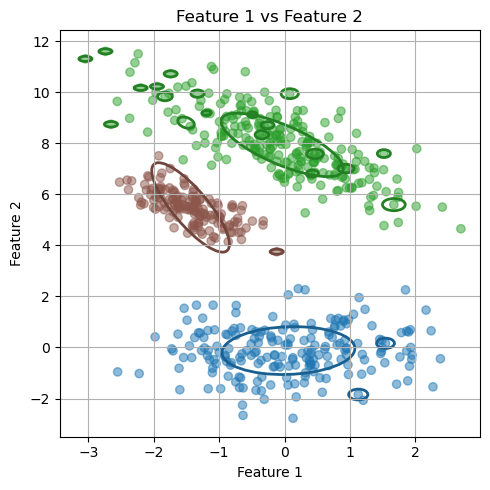

'\n%lprun  -f model.forward -f model.merging_mech.compute_kappa_matrix -f model.merging_mech.merge_clusters -f model.merging_mech.merging_mechanism -f model.merging_mech.validate_cluster_parameters -f model.merging_mech.compute_cluster_parameters -f model.merging_mech.plot_cluster -f model.merging_mech.perform_merge -f model.clustering.increment_or_add_cluster -f model.clustering._increment_cluster -f model.clustering._add_new_cluster -f model.math_ops._compute_covariance_inverse -f model.math_ops._update_inverse_covariance -f model.math_ops.compute_distance_and_activation -f model.math_ops.defuzzifyprocess_sample_data()\n'

In [ ]:
%load_ext line_profiler

def process_sample_data():
    for z, label in zip(sample_data, sample_labels):
        model.forward(z, label)
    plot_pairwise_against_first_feature(sample_data, sample_labels, model=model, num_sigma=num_sigma, N_max=0)   

process_sample_data()


'''
%lprun  -f model.forward \
-f model.merging_mech.compute_kappa_matrix \
-f model.merging_mech.merge_clusters \
-f model.merging_mech.merging_mechanism \
-f model.merging_mech.validate_cluster_parameters \
-f model.merging_mech.compute_cluster_parameters \
-f model.merging_mech.plot_cluster \
-f model.merging_mech.perform_merge \
-f model.clustering.increment_or_add_cluster \
-f model.clustering._increment_cluster \
-f model.clustering._add_new_cluster \
-f model.math_ops._compute_covariance_inverse \
-f model.math_ops._update_inverse_covariance \
-f model.math_ops.compute_distance_and_activation \
-f model.math_ops.defuzzify\
process_sample_data()
'''

In [ ]:
feature_dim = 20  # or whatever the correct value is
N_max = 20 # Maximum number of clusters, provide an appropriate value
num_sigma = 2
kappa_join = 4 # Joining parameter, provide an appropriate value
S_0 = 1e-3 # Initial potential value, provide an appropriate value
c_min = 1
num_classes = 1

# Extract labels from the y dataframe
labels = y['class'].values

# Initialize the model again
# Check if GPU is available and set the device accordingly
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = eGAUSSp(feature_dim, num_classes, N_max, num_sigma, kappa_join, S_0, c_min, device)

%load_ext line_profiler

def training_loop():
    for idx, (point, label) in enumerate(zip(X.values, labels)):
        point_tensor = torch.tensor(point, dtype=torch.float32).to(device)
        label_tensor = torch.tensor(label, dtype=torch.float32).to(device)
        model(point_tensor, label_tensor)
        if (idx + 1) % 100 == 0:  # +1 because indexing starts from 0
            print(f"** Processed {idx + 1} points. **")
            plot_pairwise_against_first_feature(X.values, labels, model=model, num_sigma=num_sigma, N_max=1)
training_loop()

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


TypeError: can't convert np.ndarray of type numpy.object_. The only supported types are: float64, float32, float16, complex64, complex128, int64, int32, int16, int8, uint8, and bool.

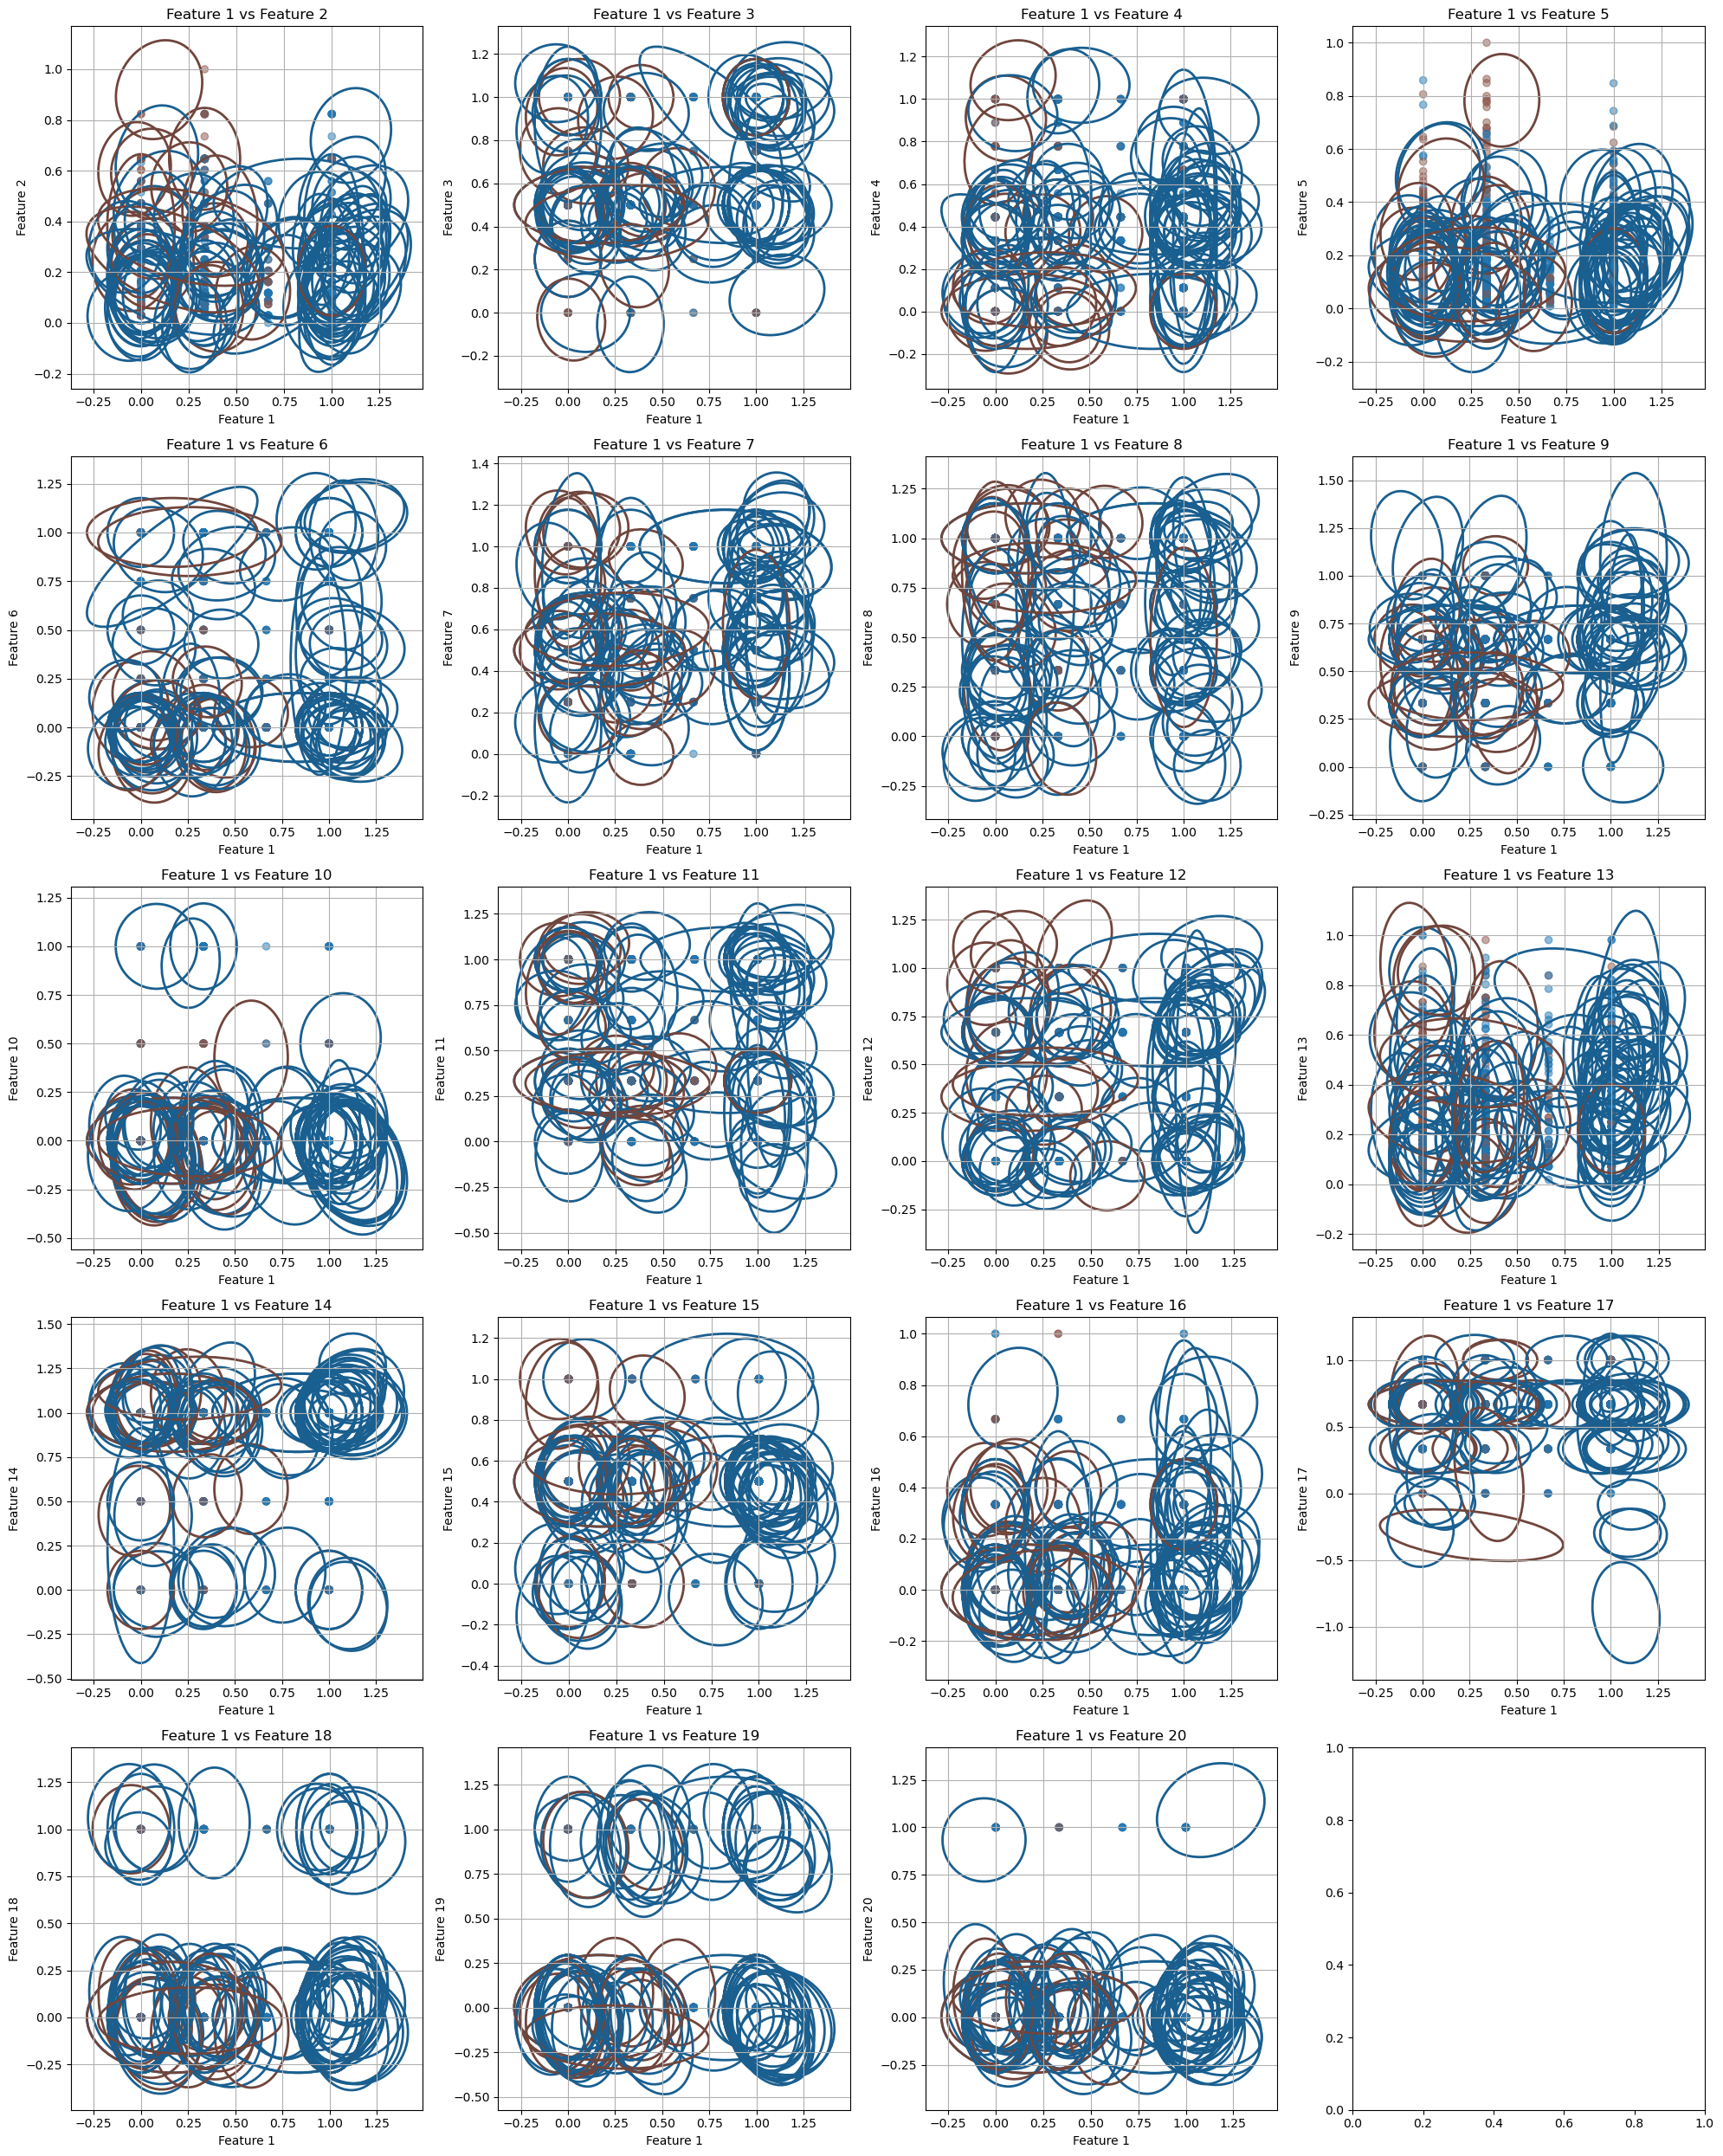

OutOfMemoryError: CUDA out of memory. Tried to allocate 178.00 MiB (GPU 0; 6.00 GiB total capacity; 4.72 GiB already allocated; 0 bytes free; 5.19 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [ ]:
import torch.optim as optim
from sklearn.metrics import f1_score, roc_auc_score

# Initialize the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Loss function (Cross-Entropy Loss for multi-class classification)
loss_function = torch.nn.CrossEntropyLoss()

def training_loop(model, X, labels, device):
    model.train()  # Set the model to training mode
    
    for idx, (point, label) in enumerate(zip(X.values, labels)):
        point_tensor = torch.tensor(point, dtype=torch.float32).to(device)
        label_tensor = torch.tensor([label], dtype=torch.int64).to(device)  # Labels are usually of type torch.long
        
        optimizer.zero_grad()  # Zero the gradients

        # Inside your training loop:
        predicted_label, label_scores = model(point_tensor, label_tensor)

        # Assuming label_scores is a tensor or can be converted directly
        scores_tensor = label_scores.to(device).unsqueeze(0)

        # Calculate the loss using the scores tensor and the label
        loss = loss_function(scores_tensor, label_tensor)
        loss.backward()
        optimizer.step()

        if (idx + 1) % 100 == 0:
            print(f"** Processed {idx + 1} points. **")
            # Assuming a batch has been processed, evaluate on the batch
            '''
            with torch.no_grad():
                
                # During evaluation:
                # Convert logits to probabilities
                probs = torch.nn.functional.softmax(scores_tensor, dim=1)
                preds = torch.argmax(probs, dim=1).cpu().numpy()
                true_labels = label_tensor.cpu().numpy()

            unique_classes = len(np.unique(true_labels))
            if unique_classes > 1:
                # Calculate F1 and AUC because there is more than one class
                f1 = f1_score(true_labels, preds, average='weighted')
                auc = roc_auc_score(true_labels, probs[:, 1].cpu().numpy())
            else:
                # Only one unique class, metrics are not defined in this case
                f1 = float('nan')  # F1 is not applicable with a single class
                auc = float('nan')  # AUC is not applicable with a single class

            print(f"F1 Score: {f1 if not np.isnan(f1) else 'Undefined due to single class in labels'}, AUC: {auc if not np.isnan(auc) else 'Undefined due to single class in labels'}")
            '''
            plot_pairwise_against_first_feature(X.values, labels, model=model, num_sigma=num_sigma, N_max=1)

#Call the training loop
training_loop(model, X, labels, device)

In [ ]:
def evaluate_model_on_training_data(X, labels, model, device):
    model.eval()  # Set the model to evaluation mode
    # Assuming your model has a method to disable evolving, which is not present in standard PyTorch models.
    model.toggle_evolving(False)  # Turn off evolving
    
    all_predictions = []
    all_labels = []
    
    with torch.no_grad():  # ensures we're not tracking gradients for updates
        for idx, (point, label) in enumerate(zip(X.values, labels)):
            point_tensor = torch.tensor(point, dtype=torch.float32).to(device)
            predicted_label,_ = model(point_tensor)  # no label provided during inference

            all_predictions.append(predicted_label.cpu().item())
            all_labels.append(label)  # No need to convert label to tensor
            
            if (idx + 1) % 100 == 0:
                print(f"** Processed {idx + 1} points. **")

    # Calculate accuracy
    accuracy = np.sum(np.array(all_predictions) == np.array(all_labels)) / len(all_labels)

    # Compute confusion matrix
    conf_matrix = confusion_matrix(all_labels, all_predictions)
    
    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()
    
    print(f"Accuracy on training data: {accuracy*100:.2f}%")
    
    return accuracy

# Call the evaluate function with your data, labels, model, and device
accuracy = evaluate_model_on_training_data(X, labels, model, device)


In [ ]:
# Initialize counters
filtered_cluster_count = 0
filtered_cluster_samples = []

for idx in range(len(model.mu)):
    # Check if the cluster has more than N_max samples
    if model.n[idx] > N_max:
        filtered_cluster_count += 1
        filtered_cluster_samples.append(model.n[idx])

print(f"Number of clusters with more than {N_max} samples: {filtered_cluster_count}")
print(f"Sample counts for these clusters: {filtered_cluster_samples}")

In [ ]:
# Initialize a dictionary to store accumulated memberships for each cluster and label
accumulated_memberships = {cluster_idx: {label: 0 for label in np.unique(y.values)} for cluster_idx in range(model.c)}

# For each sample, compute its membership degree to each cluster and accumulate
for point, label in zip(X.values, y.values.ravel()):
    gamma, _ = model.math_ops.compute_distance_and_activation(torch.tensor(point).float())
    gamma_values = gamma.detach().numpy()
    
    for cluster_idx in range(model.c):
        accumulated_memberships[cluster_idx][label] += gamma_values[cluster_idx]

accumulated_memberships


In [ ]:
predicted_cluster_labels = {}

for cluster_idx, memberships in accumulated_memberships.items():
    predicted_cluster_labels[cluster_idx] = max(memberships, key=memberships.get)

predicted_cluster_labels
plot_pairwise_against_first_feature(X.values, labels, model=model, num_sigma=num_sigma, N_max=0)